In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense


In [2]:
X = np.load("X.npy")[:1000]
y = np.load("y.npy")[:1000]

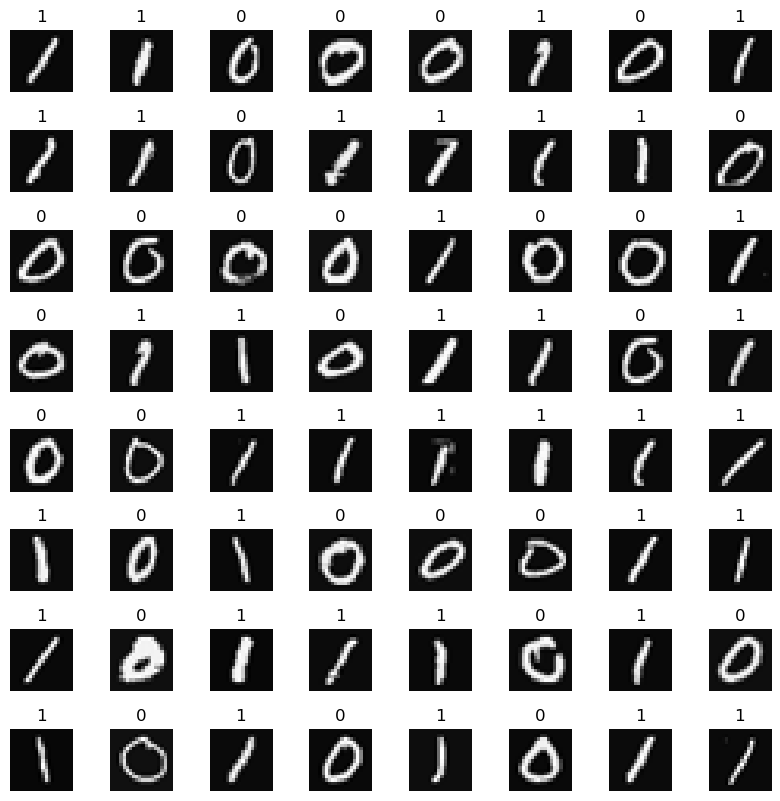

In [3]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [10]:
model = Sequential([
    tf.keras.Input(shape=(400,)),    #specify input size
    Dense(25, activation = "relu", name = "layer1"),
    Dense(15, activation = "relu", name = "layer2"),
    Dense(1, activation = "sigmoid", name = "layer3")
]
)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                10025     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [20]:

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(0.001))
model.fit(X_train, y_train,
          epochs = 20)

Epoch 1/20
24/24 [==============================] - 0s 934us/step - loss: 0.1377
Epoch 2/20
24/24 [==============================] - 0s 846us/step - loss: 0.0419
Epoch 3/20
24/24 [==============================] - 0s 924us/step - loss: 0.0187
Epoch 4/20
24/24 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 5/20
24/24 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 6/20
24/24 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 7/20
24/24 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 9/20
24/24 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 10/20
24/24 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 11/20
24/24 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 12/20
24/24 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 13/20
24/24 [========================

In [ ]:
prediction = model.predict(X_test)

## logistic
result = prediction > 0.5

8/8 [==============================] - 0s 940us/step


In [34]:
print(f"Accuracy_score : {accuracy_score(result, y_test)}")

Accuracy_score : 1.0


In [ ]:
## check weight
[layer1, layer2, layer3] = model.layers

In [37]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [43]:
print(f"W1_1 weight : {W1[0]},\n b1_1 weight : {b1[0]}")
print(f"W2_1 weight : {W2[0]},\n b2_1 weight : {b2[0]}")
print(f"W3_1 weight : {W3[0]},\n b3_1 weight : {b3[0]}")

W1_1 weight : [ 0.00126761 -0.02906568  0.04619886 -0.10076308 -0.07363223 -0.11874646
  0.0960684   0.01609099  0.0218256  -0.08069531  0.07732996 -0.02739606
 -0.02727422 -0.02318596  0.01688449  0.10575445  0.11031646 -0.01912229
 -0.0695621  -0.07211961 -0.10831134  0.08872668  0.07534949  0.00774628
  0.05529308],
 b1_1 weight : -0.015310663729906082
W2_1 weight : [ 0.08716659 -0.0867229   0.06576458 -0.4132713   0.19146454  0.1957155
 -0.16507326  0.26730752  0.01439081  0.03051773  0.26259434  0.10673913
  0.32655308  0.30857843 -0.00069847],
 b2_1 weight : 0.07369562238454819
W3_1 weight : [0.31600142],
 b3_1 weight : 0.06359578669071198
